# **Shapley Values Annotated Notebook** for *Heart Disease*
By: Shrestha Mishra

---
## Features:

1.   Age
2.   Sex
3. Chest Pain Type (4 values)
4. Resting Blood Pressure
5. Serum Cholestoral in mg/dl
6. Fasting Blood Sugar > 120 mg/dl
7. Resting Electrocardiographic Results (values 0, 1, 2)
8. Maximum Heart Rate Achieved
9. Exercise Induced Angina
10. Oldpeak = ST Depression induced by Exercise Relative to Rest
11. Slope of the Peak Exercise ST Segment
12. Number of Major Vessels (0-3) Colored by Flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


---


## Classification Results:

0 = No Heart Disease

1 = Heart Disease


---


[Link to Dataset on Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)



---


Installation of SHAP Library

[Link to Documentation](https://shap.readthedocs.io/en/latest/index.html)

In [1]:
#!pip install shap

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import shap
from sklearn.preprocessing import MinMaxScaler

/opt/miniconda3/envs/pyenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


In [5]:
x = scaled_df.drop('target', axis=1)
y = scaled_df['target']

In [6]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
model.score(x_test, y_test)

0.9853658536585366

Compute SHAP values for the input data (x).

If you want to compute SHAP values for a subset of your data,
you can uncomment the line below to analyze only the first 100 instances.
This can be useful for large datasets to improve performance or for focused analysis.

In [9]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(x)
#shap_values = explainer(x[0:100])

The shape of the SHAP values array is (1025, 13, 2)

Breakdown of the shape:
- 1025: Number of instances (rows) for which SHAP values have been computed.
- 13: Number of features (columns) used in the model.
- 2: This represents the number of output classes (for multi-class classification).
In this case, it indicates that the model predicts two classes, and SHAP values are calculated for each class separately.

This means there are SHAP values for each feature for each instance across the two classes.


In [10]:
np.shape(shap_values.values)

(1025, 13, 2)

#Waterfall plots are a powerful visualization tool for interpreting SHAP values.
They display how individual feature contributions combine to influence a model's prediction for a specific instance.


---


#Explanation of the indexing:

 **shap_values[i, :, j]**:
- i: The index of the observation (instance) we are analyzing.
- : (colon): This means we are selecting all the features for that instance.
- j: The index of the output class (0 for "no disease" and 1 for "disease").
 This structure allows us to visualize SHAP values for specific instances and classes,
 enabling a detailed understanding of how features influence model predictions for different outcomes.

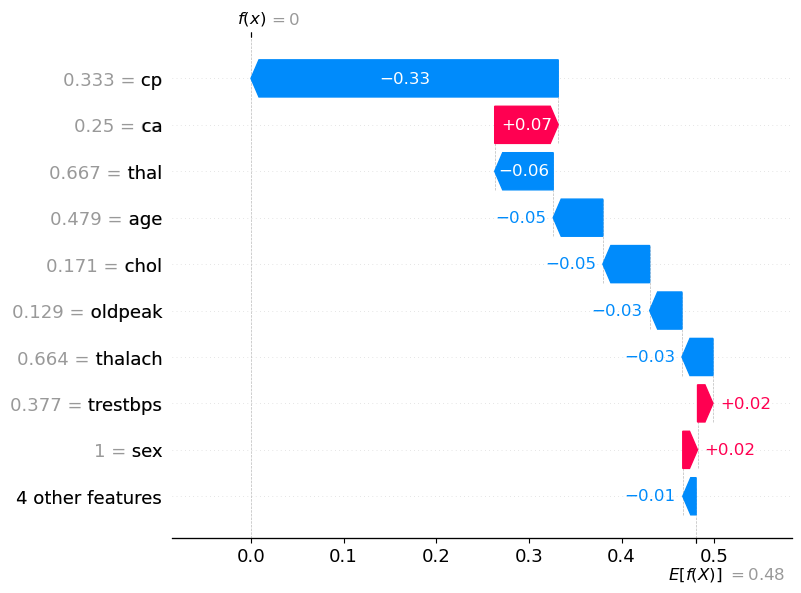

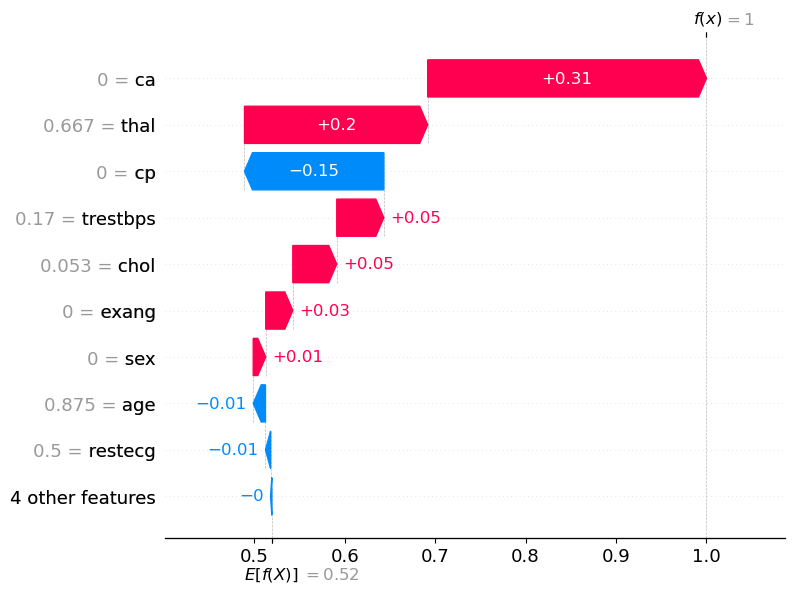

In [11]:
#Waterfall Plot for First Observation (for no disease)
shap.plots.waterfall(shap_values[79, :, 0])

#Waterfall Plot for First Observation (for disease)
shap.plots.waterfall(shap_values[10, :, 1])

#Force plots are a powerful visualization tool for interpreting SHAP values.


---


# Initialize JavaScript visualization for SHAP using **shap.initjs()**  
This is necessary for rendering interactive plots in Jupyter or Colab environments and is ran in *every cell* where there is a visualization.

In [12]:
shap.initjs()

#Force Plot for First Observation (for disease)
shap.plots.force(shap_values[79, :, 0])

In [13]:
shap.initjs()

#Force Plot for First Observation (for no disease)
shap.plots.force(shap_values[10, :, 1])